## **1) Problem Statement**

In [1]:
# Client wants a model where it should classify the image as Pikachu, Balabasaur
# or Charmandar. These are few of the types of pokemon https://en.wikipedia.org/wiki/Pok%C3%A9mon
# This is case of MultiImage multiclass classification
# The client want us to build a model so that if image is given to model, it should say that
# it is Pikachu, Balbasaur or Charmanadar


## Challanges faced

#1) Does Client has enough Dataset - No, only 4-5 images.

#2) How to get dataset
# We need atleast 400-500 images (lot of images)
# The image should also have label.
# Solution - We have written python code. Inside that we called 
# Binge API (from Microsoft) for downloading the dataset. (not shown in this file)
# the image of Pokemon has 3 types mentioned.
# This way we could download 500 images (150 - Pikachu, 150 -Balbasaur, 200 - Charmandar)

#3) Data storage 
# We have created dataset folder under mydrive
# We stored the dataset in google drive
# We can train the model in colab
# Based on Keras doc, we organized a data in such a way that training is possible.
# Created under my drive folder "datset" folder, under that created 
# training_set and test_set
# Under training_set created 3 folders - pikachu, balbasaur and charmandar
# Inside these folder we hae saved the related images.
# These folder name will act as a label. eg. image inside balbasaur folder will
# have balbasaur label. Similarly this is the case with other image.
# This is the way in which keras read data otherwise it will not understand which
# image will have which label.

#4) Othes issues faced

# 4.1) Resize 
# There is variation in size of images. For example resolution for some 
# images are 150*150, 200*200, 80*80, 400*350 etc.
# With different size we cannot train the model
# We have done rescaling. 


# 4.2) Depth 
# Since colored image, depth =3 (RGB Format , for black white, depth = 1)
# We have make depth 3 for all images

# 4.3) CNN model has less images in dataset
# To overcome this issue we have done data augmentation
# for example we can generate more image from exiating image by performing 
# various activities - zoom in, zoom out, 180 degree Flip, Rotation, Shear, Crop etc.
# So with above activities we can get new images count as = 500*6 = 3000
# We will do data augmenatation for traning dataset



## Sample images of Piakchu

![image.png](
  

)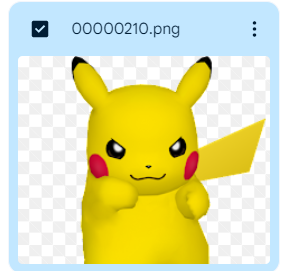

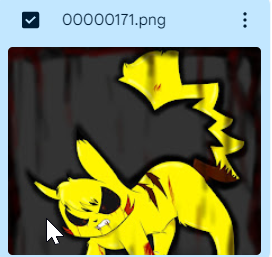

## Sample images of Charmandar

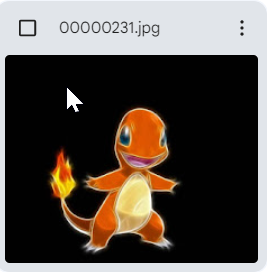

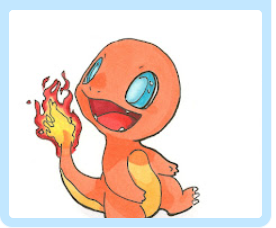

## Sample images of Bulbasaur

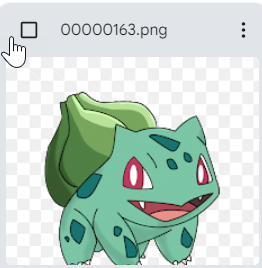

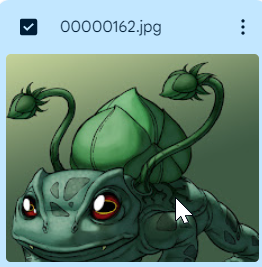

## **2) Model Building**

In [2]:
## To access data , we need to mount google drive at colab.
## Initially the steps were longer for mounting drive but now product has be come stable.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.getcwd() ## need  to know current working directory

'/content'

In [5]:
# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [6]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))  ## Applying Maxpooling of 2*2 size , the output of prev convolution layer comes to maxpooling

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu')) ## Applying Convolution and Relu again with 32 nodes and 3*3 filter
classifier.add(MaxPooling2D(pool_size = (2, 2))) ## Again applying Maxpooling

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 3, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [7]:
### Explanation of codes
## models.Sequential() will create sequential model which is empty container.

## classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
 # Adding convolution layer with 32 nodes
 # (3, 3) - Filter Size
 # We have applied Relu [activation='relu'], so that we do not have to apply relu seperartely
 # input_shape = (64, 64, 3) - We do not have the images of this size, but I have commited to My Deep
 # Learning model that I will give you images of this size only.
 # That means in the preprocessing part I have to resize image to this size only. This size is called target size
 # If we want we can size to (150,150,3) - Why 3 because it specifies depth since color image 
 # (128, 128) or (32,32) - two parameters can change
 # Input size is mandatory in any sequential layer

 ## Step 1 to Step 3  - CNN , Step 4 - 


## classifier.add(Dense(units = 128, activation = 'relu'))
 # First hidden layer with 128 nodes
 # We do not specify input size since input coming from previous layer 
 # Input layer will be created based on number of features coming from prev layer. 
 # Note when we only created ANN and not CNN , we specified number of dimesnions.

## classifier.add(Dense(units = 3, activation = 'softmax'))
 # Number of nodes = 3 since number of classes is 3 - Pikachu, Charmander, Balbasaur
 # Since multiclass specification, we have to use activation='softmax'


In [8]:
classifier.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f4728559e50>>

#** Preprocessing**
- How we can resize image to (64,64,3)
- Data Augmentation - generating more images

In [9]:

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Found 445 images belonging to 3 classes.
Found 238 images belonging to 3 classes.


In [10]:
### Explanation of codes
 
 ## ImageDataGenerator - Class in keras which generate data for us.
  # We need to ImageDataGenerator one for training and other for test 

 ## First object (datagenerator) creating for training data for genreating new images
 ## train_datagen = ImageDataGenerator(rescale = 1./255, --Calling constructor and asking to rescale image
 ## dividing by 255 , performed min-max scaling ((x - min)/(max -min))), max value =255,min = 0     
 ##                          shear_range = 0.2,  --- Please Shear image
 ##                          zoom_range = 0.2, -- Please Zoom image
 ##                          horizontal_flip = True) -- Please do horizontal_flip


 ## Second object(datagenerator) creating for training data for genreating new images
 ## test_datagen = ImageDataGenerator(rescale = 1./255)
  # We are only telling to rescaling no zoom, shear, flip
  # since we need more data for training purpose. Even if we have less image in test
  # we can do predcition. The requirement to have more image is in training and not test dataset

 ## Now we to attach these datagenerators to some data source so that they can 
 ## read data and preform required activities.


 ## training_set = train_datagen.flow_from_directory('/content/drive/My Drive/dataset/training_set',
 ## Given location of training images - training_set   
 ## Inside training_set it will find 3 folders - pickachu, balbasaur and charmandar                                     
 ##      target_size = (64, 64), -- Specifying generator when you generate images, 
 ##  please keep size of all image as 64, 64
 ##      batch_size = 32,
 ##      class_mode = 'categorical') -- Categorical name to every data

 ## Now training and test images will be of same size

In [11]:
## Data generation has not started

## Found 445 images belonging to 3 classes.  - Training - 445 images in 3 classes.
## Found 238 images belonging to 3 classes.  - Test - 238 images in 3 classes.

## Data Generation will take place when we train the model

In [12]:
print (type(training_set))
print (type(train_datagen))

<class 'keras.preprocessing.image.DirectoryIterator'>
<class 'keras.preprocessing.image.ImageDataGenerator'>


In [13]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 100,
                         epochs = 5,#25
                         validation_data = test_set,
                         validation_steps = 200)

<ipython-input-13-3cd765b076e1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


Epoch 1/5
  7/100 [=>............................] - ETA: 14:11 - loss: 0.9853 - accuracy: 0.5179

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 14/100 [===>..........................] - ETA: 12:06 - loss: 0.7869 - accuracy: 0.6157

100/100 [==============================] - 210s 2s/step - loss: 0.7869 - accuracy: 0.6157 - val_loss: 0.5180 - val_accuracy: 0.7647


In [16]:
### Explanation of codes 
## classifier.fit_generator(training_set, classifier is name of model
## training_set - model training
##             steps_per_epoch = 100, -- When 100 steps complete count as 1 epoch
## previously mentioned batch_size = 32, which means in each step we will pass 32 images
## When 100 batches over then it is called one epoch
##             epochs = 5,#25
##             validation_data = test_set,
##             validation_steps = 200)

## The more epochs we have better prediction  


## **3) Prediction**

In [17]:
# Get the class indices
train_datagen.class_indices  ## Gives error - Solution
# https://stackoverflow.com/questions/71448336/how-to-fix-dataframeiterator-object-has-no-attribute-class-names

AttributeError: ignored

In [ ]:
training_set.class_indices

In [18]:
training_set

In [19]:
training_set.image_shape 


(64, 64, 3)

In [20]:
type (training_set)

keras.preprocessing.image.DirectoryIterator

In [21]:
import numpy as np

In [22]:
predictions = np.argmax(classifier.predict(test_set),axis=1)  ##  #classifier.predict_classes(training_set)
predictions = predictions.reshape(1,-1)[0]

8/8 [==============================] - 9s 1s/step


In [23]:
#predictions = np.argmax(classifier.predict(test_set),axis=1)  ##  #classifier.predict_classes(training_set)

#predictions
#predictions.shape
#predictions = predictions.reshape(1,-1)

In [24]:
predictions

array([2, 1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 1, 2, 2, 1, 0,
       2, 2, 2, 0, 0, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0,
       2, 0, 0, 1, 1, 2, 1, 0, 1, 2, 0, 0, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 0, 2,
       1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 1, 0, 1, 0, 2, 0, 1, 0,
       2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 1, 0, 0, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0,
       2, 0, 0, 2, 0, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2])

In [25]:
predictions.shape

(238,)

In [26]:
predictions[0]

2

In [27]:
predictions[1]

1

In [28]:
test_set.class_indices

{'bulbasaur': 0, 'charmander': 1, 'pikachu': 2}

In [29]:
test_set.labels ## My coding

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [30]:
# For confusion matrix referred
# https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/
# https://pub.towardsai.net/multiclass-image-classification-hands-on-with-keras-and-tensoflow-e1cf434f3467

In [31]:
test_set

In [32]:
test_set.labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [33]:
test_set.labels.shape

(238,)

In [34]:
# predictions = predictions.reshape(1,-1)[0]
#test_label = test_set.labels.reshape(1,-1)
#test_label

In [35]:
test_set.labels.shape

(238,)

In [36]:
predictions.shape

(238,)

In [37]:
## https://www.tensorflow.org/tutorials/images/classification
## Not done one hot encoding

In [38]:
test_set.labels.shape

(238,)

In [39]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix


In [40]:
metrics.confusion_matrix (test_set.labels, predictions)

array([[24, 16, 42],
       [22, 16, 40],
       [26, 14, 38]])

In [41]:
print(classification_report(test_set.labels, predictions))

              precision    recall  f1-score   support

           0       0.33      0.29      0.31        82
           1       0.35      0.21      0.26        78
           2       0.32      0.49      0.38        78

    accuracy                           0.33       238
   macro avg       0.33      0.33      0.32       238
weighted avg       0.33      0.33      0.32       238



In [42]:
print(classification_report(test_set.labels, predictions, target_names = ['bulbasaur (Class 0)','charmander (Class 1)','pikachu (Class 2)' ]))
###Different techniques tried for prediction**

                      precision    recall  f1-score   support

 bulbasaur (Class 0)       0.33      0.29      0.31        82
charmander (Class 1)       0.35      0.21      0.26        78
   pikachu (Class 2)       0.32      0.49      0.38        78

            accuracy                           0.33       238
           macro avg       0.33      0.33      0.32       238
        weighted avg       0.33      0.33      0.32       238



## Using the pretrained model: VGG16

### The process is called transfer learning 
- where we are using pretained model
- from VGG16. Done when we don't have enough data / image for training
- The pretrained model are trained on million of images 

In [43]:
from keras.applications import VGG16

In [44]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [45]:
### Explanation of codes
## conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3)) 

## Creating object of VGG16 
## please initialize weight from imagenet, which is a datsset
## include_top=False -- please do not include ANN , I just want to add base part CNN ()
## CNN is called base and ANN top
## input_shape=(150, 150, 3)  ## We can specify any which means we have to convert all image to 150,150.

## Now this conv_base will work for us

In [46]:
from keras import models
from keras import layers
import os
model = models.Sequential()
model.add(conv_base) ## The conv_base created above
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [47]:
### Explanation of codes 


## model = models.Sequential() -- Created Empty sequential model
## model.add(conv_base)
# Insted of creating our own convolution 
# We are adding The conv_base created which we got from VGG16 and no maxpooling
# We are directly adding flattening
# The adding own ANN
# -  model.add(layers.Dense(256, activation='relu'))
# -  model.add(layers.Dense(3, activation='softmax'))



In [48]:
conv_base.trainable = False # do not train the conv-base

In [49]:
##https://blogs.rstudio.com/ai/posts/2017-12-14-image-classification-on-small-datasets/

In [50]:
base_dir = '/content/drive/My Drive/dataset/'
train_dir = os.path.join(base_dir, 'training_set')

test_dir = os.path.join(base_dir, 'test_set')

In [51]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255) #rescale factor is feature scalling, convert values in the range of 0-1 before applying any processing

In [52]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='categorical')

Found 445 images belonging to 3 classes.


In [53]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='categorical')

Found 238 images belonging to 3 classes.


In [54]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [55]:
history = model.fit_generator(train_generator, steps_per_epoch=100,
                              epochs=30,
                              validation_data=test_generator,
                              validation_steps=50)

<ipython-input-55-92a9bc40cebf>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=100,


Epoch 1/30
  6/100 [>.............................] - ETA: 8:02 - loss: 1.0150 - acc: 0.4583

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 23/100 [=====>........................] - ETA: 6:32 - loss: 0.9740 - acc: 0.5438

100/100 [==============================] - 202s 2s/step - loss: 0.9740 - acc: 0.5438 - val_loss: 0.8213 - val_acc: 0.6807


In [57]:
history

### Using a pre trained model: Fine Tuning the pre trained model

Another widely used technique for model reuse, complementary to feature
extraction, is fine-tuning (see figure 5.19). Fine-tuning consists of unfreezing a few of
the top layers of a frozen model base used for feature extraction, and jointly training
both the newly added part of the model (in this case, the fully connected classifier)
and these top layers. This is called fine-tuning because it slightly adjusts the more
abstract representations of the model being reused, in order to make them more relevant
for the problem at hand.

Thus the
steps for fine-tuning a network are as follow:
1 Add your custom network on top of an already-trained base network.
2 Freeze the base network.
3 Train the part you added.
4 Unfreeze some layers in the base network.
5 Jointly train both these layers and the part you added.
You already completed the first three steps when doing feature extraction. Let’s proceed
with step 4: you’ll unfreeze your conv_base and then freeze individual layers
inside it.

You’ll fine-tune the last three convolutional layers, which means all layers up to
block4_pool should be frozen, and the layers block5_conv1, block5_conv2, and
block5_conv3 should be trainable.

- chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://condor.depaul.edu/ntomuro/courses/594ADL-2020fall/Chollet/Chollet-v1-pretrained.pdf

In [58]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
    
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [59]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=test_generator,
    validation_steps=50)

<ipython-input-59-ab102023bc8c>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
 23/100 [=====>........................] - ETA: 7:43 - loss: 0.5416 - acc: 0.7888

100/100 [==============================] - 204s 2s/step - loss: 0.5416 - acc: 0.7888 - val_loss: 0.3191 - val_acc: 0.8824


Here’s what you should take away from the exercises in the past two sections:

Convnets are the best type of machine-learning models for computer-vision
tasks. It’s possible to train one from scratch even on a very small dataset, with
decent results.

On a small dataset, overfitting will be the main issue. Data augmentation is a
powerful way to fight overfitting when you’re working with image data.

It’s easy to reuse an existing convnet on a new dataset via feature extraction.
This is a valuable technique for working with small image datasets.

As a complement to feature extraction, you can use fine-tuning, which adapts to
a new problem some of the representations previously learned by an existing
model. This pushes performance a bit further.

In [60]:
divmod(23,5)

(4, 3)